In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from atlas_topq_2019_23_Limits import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 20)

In [19]:
# data = np.genfromtxt('/home/lessa/Downloads/4data.csv',delimiter=',',skip_header=1)
# data = np.array(sorted(data.tolist(), key = lambda pt: pt[0]))
# data
data = np.array([[0.01167904034, 3.0262927496621087e-06, 8.92340187674241e-09], [0.0088235151258, 2.317914207827015e-06, 7.675004390767219e-09], [0.0054906102774000005, 1.462114873185644e-06, 5.867623162330135e-09], [0.0027753818129999997, 7.428220358939738e-07, 3.761947150673253e-09], [0.001211230518, 3.159291590463169e-07, 2.0654090427218577e-09], [0.00047528193632, 1.2116267473427062e-07, 1.0194375037650542e-09], [0.00016821533568, 4.088012674297723e-08, 4.469382582580545e-10], [8.188176153600001e-06, 1.7274789507987556e-09, 2.8802874137196036e-11]])
ct = 4.0
ct = 1./(169.5*1e-3)
print('ct=',ct)
signal = data[:,1]*ct**2 + data[:,2]*ct**4
print(signal)

ct= 5.899705014749262
[1.16145363e-04 8.99767456e-05 5.79997185e-05 3.04126251e-05
 1.34986246e-05 5.45229317e-06 1.96435784e-06 9.50220323e-08]


In [21]:
# ### Load CMS data
xsecsObs,sm,covMatrix = read_ATLASdata()
# ### Load LO background from MG5
smLO = getSMLO()
# Get k-factor for each bin
kfac = getKfactor(sm,smLO)
sm = sm/bin_widths

In [22]:
bin_centers=(atlas_bins[:-1]+atlas_bins[1:])/2

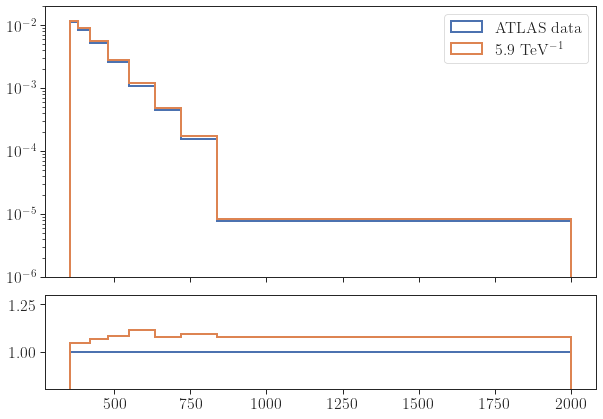

In [24]:
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 0.7]},figsize=(9,7))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

axarr[0].hist(bin_centers,weights=xsecsObs,label='ATLAS data',histtype='step',linewidth=2,bins=atlas_bins)
axarr[0].hist(bin_centers,weights=sm+signal,label=r'%1.1f TeV$^{-1}$' %ct,histtype='step',linewidth=2,bins=atlas_bins)
axarr[0].set_yscale('log')
axarr[0].set_ylim(1e-6,2e-2)
axarr[0].legend()

axarr[1].hist(bin_centers,weights=np.divide(xsecsObs,xsecsObs),histtype='step',linewidth=2,bins=atlas_bins)
axarr[1].hist(bin_centers,weights=np.divide(sm+signal,xsecsObs),histtype='step',linewidth=2,bins=atlas_bins)
axarr[1].set_ylim(0.8,1.3)
plt.show()

In [25]:
# sigg = np.array([3.05662421e-06, 2.31550010e-06, 1.44908334e-06, 7.41189353e-07, 3.17836974e-07, 1.21117828e-07, 4.10799094e-08, 1.72852629e-09])
# print(sm)
# print(xsecsObs)
res  = getUL(signal,sm,xsecsObs,covMatrix)
yDM95 = res['yDM95']
chi2min = res['chi2min']
print(res)

{'yDMmin': array([0.]), 'chi2min': 10.139227277087516, 'yDM95': 1.0015214018925052, 'deltaChi95': 3.8400000000000176}


In [26]:
yDMvals = np.linspace(0.,2.0,200)
deltas = 0.0
c2 = np.array([chi2(y, signal, sm, xsecsObs, covMatrix, deltas) for y in yDMvals])

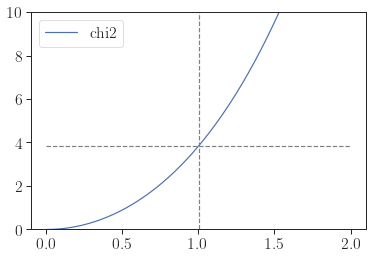

In [27]:
plt.plot(yDMvals,c2-chi2min,label='chi2')
plt.hlines(y=3.84,xmin=yDMvals.min(),xmax=yDMvals.max(),linestyles='dashed',colors='gray')
plt.vlines(x=yDM95,ymin=0,ymax=10.,linestyles='dashed',colors='gray')
# plt.vlines(x=yDM95b,ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.legend()
plt.ylim(0,10)
plt.show()